# Project 2 report (for Shuxiao)

## Important note

For running this code, it is required to install/import the following packages:

1. geopy <br>
To install it, open Terminal or Conda Prompt and run: `conda install -c conda-forge geopy`
2. Folium <br>
To install it, open Terminal or Conda Prompt and run: `conda install -c conda-forge Folium`
3. matplotlib <br>
To install it, open Terminal or Conda Prompt and run: `conda install -c conda-forge matplotlib`
4. pandas <br>
To install it, open Terminal or Conda Prompt and run: `conda install -c conda-forge pandas`
5. seaborn <br>
To install it, open Terminal or Conda Prompt and run: `conda install -c conda-forge seaborn`
6. Shapely <br>
To install it, open Terminal or Conda Prompt and run: `conda install -c conda-forge shapely`
7. math <br>
Built-in library
8. os <br>
Built-in library

### In addition, to use the Python scripts developed for this project, import them as :

`import key_places_bikes as bikes` <br>
`import border`

## Distribution plots for Hospitals data

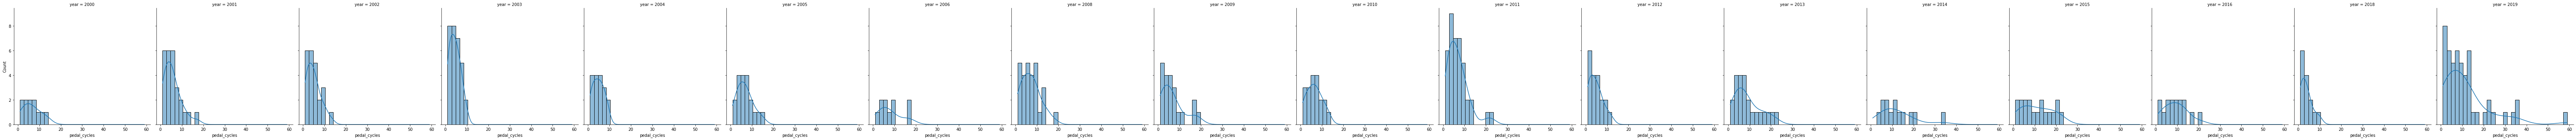

In [1]:
import key_places_bikes as bikes
import pandas as pd
import seaborn as sns

# this is the whole dataframe
hospital = bikes.BikesOnPopularSpots("hospitals")
market = bikes.BikesOnPopularSpots("markets")

# select only pedal_cycles and then get a list. This will take about 3 minutes.. Be patient.
hospital_list = hospital["pedal_cycles"].tolist()
market_list = market["pedal_cycles"].tolist()

sns.displot(data=hospital, x="pedal_cycles", col="year", kde=True)

## Distribution plots for the Market data

C:\Users\Mariel\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


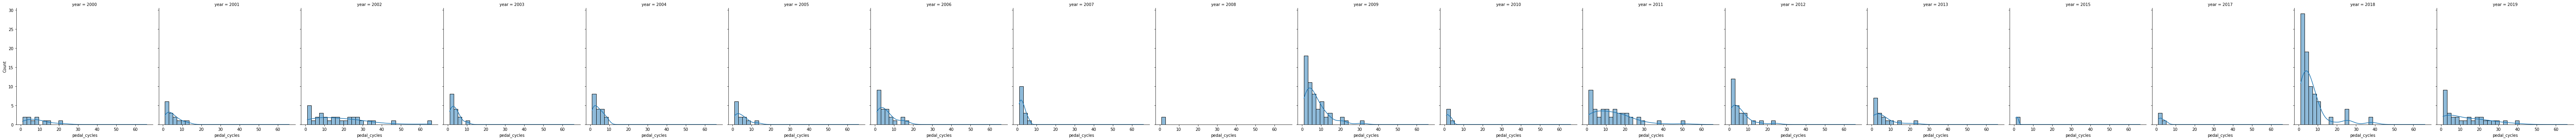

In [24]:
import key_places_bikes as bikes
import pandas as pd
import seaborn as sns

# this is the whole dataframe
market = bikes.BikesOnPopularSpots("markets")

# select only pedal_cycles and then get a list. This will take about 3 minutes.. Be patient.
market_list = market["pedal_cycles"].tolist()

sns.displot(data=market, x="pedal_cycles", col = "year", kde = True)

# Bikes crossing the Anglo-Scottish border

The following map shows the 3 different methods implemented for calculating the number of bikes crossing the Anglo-Scottish border in the whole dataset. A rough approximation of the border is plotted as a visual aid using a green line. <br>

1. **Midpoint method** <br>
This method calculates a middle point of the border and discard anything that exceed 10 km from this middle point. This method will yield some inaccurate results, as it calculates the distance this middle point to each roadpoint. <br>
2. **Interval method** <br>
This method requires to have a list of the major border crossing points. This method will add a 0.005 degrees shift to the latitude (when the crossing is done South-North) or subtract 0.005 degrees to the longitude (when the crossing is done West-East). 0.005 degrees is approximately 555 m. This method may offer incorrect results due to the shifting done per border crossing <br>
3.  **Polygon method** <br>
This method calculates 2 polygons: East polygon and West-central polygon and will consider only the roadpoints that are within 555 m from the border (0.005 degrees)

In [4]:
import border
import folium

# Get the bikes found in the border using the 3 implemented methods
bikesOnBordersInterval = border.FindBikesInterval()
bikesOnBordersMidpoint = border.FindBikesMidpoint()
bikesOnBordersPolygon = border.FindBikesPolygon()

# Create a map of the Scottish Borders
borderLat = 55.5486
borderLong = -2.786

# Instantiate a feature group for the stations in the dataframe
bikesInterval = folium.map.FeatureGroup(name = "Interval method")
bikesMidpoint = folium.map.FeatureGroup(name = "Midpoint method")
bikesPolygon = folium.map.FeatureGroup(name = "Polygon method")

# Add each roadpoint where bikes are found to the feature group
for lat, lng, in zip(bikesOnBordersInterval.latitude, bikesOnBordersInterval.longitude):
    bikesInterval.add_child(
        folium.CircleMarker([lat, lng], radius=5, color='purple', fill=True, fill_color='purple', fill_opacity=0.4))
for lat, lng, in zip(bikesOnBordersPolygon.latitude, bikesOnBordersPolygon.longitude):
    bikesPolygon.add_child(
        folium.CircleMarker([lat, lng], radius=5, color='blue', fill=True, fill_color='blue', fill_opacity=0.4))
for lat, lng, in zip(bikesOnBordersMidpoint.latitude, bikesOnBordersMidpoint.longitude):
    bikesMidpoint.add_child(
        folium.CircleMarker([lat, lng], radius=5, color='orange', fill=True, fill_color='orange', fill_opacity=0.4))

# Add the feature groups to the map
borderMap = folium.Map(location=[borderLat, borderLong], zoom_start=8)
borderMap.add_child(bikesInterval)
borderMap.add_child(bikesMidpoint)
borderMap.add_child(bikesPolygon)

# Add a layer control to the map and other tile layer options
folium.TileLayer('cartodbpositron').add_to(borderMap)
folium.TileLayer('stamentoner').add_to(borderMap)
folium.map.LayerControl('topright', collapsed=False).add_to(borderMap)

# Draw the border line and add it to the map
borderWest = (54.995769, -3.052872)
borderEast = (55.806881, -2.042987)
borderCarham = (55.63214657346817, -2.336614595368269)
borderCheviot = (55.47085898747139, -2.1707897097633344)

border1 = [(borderCarham[0], borderCarham[1]), (borderEast[0], borderEast[1])]
border2 = [(borderCheviot[0], borderCheviot[1]),(borderCarham[0], borderCarham[1])]
border3 = [(borderWest[0], borderWest[1]), (borderCheviot[0], borderCheviot[1])]

folium.PolyLine(border1, color='green', weight=4, opacity=0.8).add_to(borderMap)
folium.PolyLine(border2, color='green', weight=4, opacity=0.8).add_to(borderMap)
folium.PolyLine(border3, color='green', weight=4, opacity=0.8).add_to(borderMap)

# Display the map
borderMap

## Plot the bike crossing results in a bar plot

<AxesSubplot:xlabel='year', ylabel='pedal_cycles'>

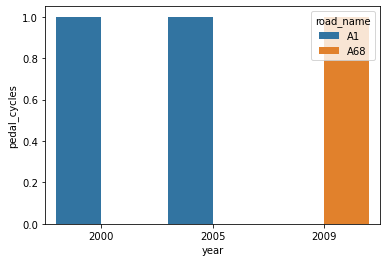

In [28]:
import seaborn as sns

# Get the bikes crossing the border using the Polygon method
bikes = border.FindBikesPolygon()

# Plot the results in a barplot by year and displaying the road names where the crossing was done
sns.barplot(data=bikes, x="year", y = "pedal_cycles", hue="road_name")